In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


%matplotlib inline

Analysing COVID-19 testing algorithm via Monte Carlo
===

See [this blog post](https://medium.com/@svineet/analysing-the-covid-19-binary-search-testing-algorithm-via-monte-carlo-method-part-1-951049cdb212)

This notebook is implementation of Part 2.

Some utilities
===

In [2]:
class CostCounter:
    def __init__(self):
        self.count = 0
    
    def increment(self):
        self.count += 1

Population Data Structure
===

In [25]:
from bisect import bisect_left, bisect_right


class COVIDPopulation:
    def __init__(self, N, K):
        """
            K is the number of infected persons in N number of people.
            It's not a percentage.
        """
        self.N = N
        
        # Now we only need to store the indices of people who are infected.
        # So we generate those via np.random.choice
        self._people_infected = np.sort(np.random.choice(N, K, replace=False))
    
    def is_infected(self, left: int, right: int):
        """
            Check if there are numbers in self._people_infected that are between
            left and right, inclusive.
        """
        left_dex = bisect_left(self._people_infected, left)
        right_dex = bisect_right(self._people_infected, right)
        
        return (right_dex-left_dex) > 0

    def __str__(self):
        return "Infected: " + str(self._people_infected) + f" out of {self.N}"

    def __repr__(self):
        return self.__str__()

In [26]:
pop = COVIDPopulation(10, 3)
print(pop._people_infected)

print(pop.is_infected(2, 3))
print(pop.is_infected(2, 5))
print(pop.is_infected(8, 9))
print(pop.is_infected(4, 4))

[3 4 5]
True
True
False
True


Actual Algorithm
===

In [135]:
# The user provides all these functions. Self explanatory.
import math

DEBUG = False


def generate_input_sample(params):
    population = COVIDPopulation(params["N"], params["K"])

    return population


def covid_binary_search(population, start, end, costly):
    if start > end: return

    # Test this whole population segment
    # Practically speaking, mix blood and do the COVID test
    if DEBUG: print(f"Testing: {start} to {end}")
    costly()
    if not population.is_infected(start, end):
        return

    # No more splitting if start == end. We just tested an individual.
    if start == end: return

    # Split into two segments [start, mid] and [mid+1, end]
    mid = math.floor((start+end)/2)
    covid_binary_search(population, start, mid, costly)
    covid_binary_search(population, mid+1, end, costly)


def covid_binary_search_wrapper(input_sample, costly):
    population = input_sample
    n = population.N

    return covid_binary_search(population, 0, n-1, costly)

Testing our implementation
===

In [139]:
sample = generate_input_sample({"N": 100, "K": 5 })
sample

Infected: [22 29 31 33 34] out of 100

In [140]:
cost_count = CostCounter()
covid_binary_search_wrapper(sample, cost_count.increment)

In [141]:
cost_count.count

31

Monte Carlo, we are here
===

In [144]:
# HYPERPARAMETER ALERT!
NUMBER_OF_SAMPLES = 1000
K_PCT = 5


def get_t_n(target_algorithm, n):
    counts = []

    # Generate a data set, crunch it, record the frequency
    for i in range(NUMBER_OF_SAMPLES):
        sample = generate_input_sample({ "N": n, "K": math.ceil(K_PCT*n/100) })
        cost_count = CostCounter()

        target_algorithm(sample, cost_count.increment)
        counts.append(cost_count.count)

    # Return average number of operations that happened
    return np.mean(counts), counts

In [145]:
%%time

t_n, counts = get_t_n(covid_binary_search_wrapper, 1000) # Get T(1000)
t_n, counts[:10]

CPU times: user 3.69 s, sys: 0 ns, total: 3.69 s
Wall time: 3.7 s


(457.34, [457, 459, 443, 479, 479, 461, 445, 463, 489, 457])

Histogram of `time measure` taken
===

(array([  7.,  20.,  39., 131., 209., 223., 219., 107.,  34.,  11.]),
 array([411. , 419.6, 428.2, 436.8, 445.4, 454. , 462.6, 471.2, 479.8,
        488.4, 497. ]),
 <a list of 10 Patch objects>)

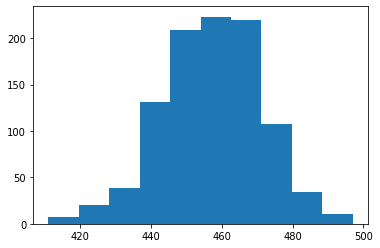

In [146]:
plt.hist(counts)

Analysis
---

Interesting! Looks like a normal distribution to me. Mean is at ~`460` with about `5%` of the population being tested infected.

In [147]:
np.max(counts), np.mean(counts)

(497, 457.34)

Obtaining $T(N)$ dataset
===

In [149]:
# Obtain T(N) for a fixed N set
MIN_N = 50
MAX_N = 500

def get_t_n_dataset(target_algorithm, min_n, max_n):
    n_arr = []
    t_n = []
    for n in range(min_n, max_n+1):
        print(f"At {n}")
        estimate, counts = get_t_n(target_algorithm, n)
        n_arr.append(n)
        t_n.append(estimate)
    
    return n_arr, t_n

n_arr, t_n = get_t_n_dataset(covid_binary_search_wrapper, MIN_N, MAX_N)
t_n[:10]

At 50
At 51
At 52
At 53
At 54
At 55
At 56
At 57
At 58
At 59
At 60
At 61
At 62
At 63
At 64
At 65
At 66
At 67
At 68
At 69
At 70
At 71
At 72
At 73
At 74
At 75
At 76
At 77
At 78
At 79
At 80
At 81
At 82
At 83
At 84
At 85
At 86
At 87
At 88
At 89
At 90
At 91
At 92
At 93
At 94
At 95
At 96
At 97
At 98
At 99
At 100
At 101
At 102
At 103
At 104
At 105
At 106
At 107
At 108
At 109
At 110
At 111
At 112
At 113
At 114
At 115
At 116
At 117
At 118
At 119
At 120
At 121
At 122
At 123
At 124
At 125
At 126
At 127
At 128
At 129
At 130
At 131
At 132
At 133
At 134
At 135
At 136
At 137
At 138
At 139
At 140
At 141
At 142
At 143
At 144
At 145
At 146
At 147
At 148
At 149
At 150
At 151
At 152
At 153
At 154
At 155
At 156
At 157
At 158
At 159
At 160
At 161
At 162
At 163
At 164
At 165
At 166
At 167
At 168
At 169
At 170
At 171
At 172
At 173
At 174
At 175
At 176
At 177
At 178
At 179
At 180
At 181
At 182
At 183
At 184
At 185
At 186
At 187
At 188
At 189
At 190
At 191
At 192
At 193
At 194
At 195
At 196
At 197
At 198
At 199


[26.64, 26.716, 26.69, 27.016, 27.118, 27.118, 27.196, 27.562, 27.674, 27.828]

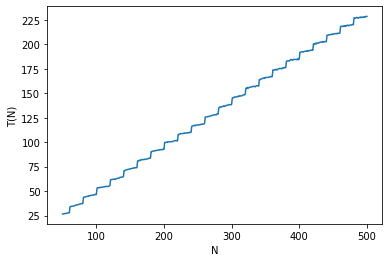

In [153]:
plt.plot(n_arr, t_n)
plt.ylabel("T(N)")
plt.xlabel("N")
plt.show()

Analysis
---

10x squiggly wiggly uWu. Looks like it's actually 2x for K = 5%.

Clearly this is also a linear time algorithm. And this is with K = 5%. If you're testing a group of people, you already have your suspicions high enough that K will be higher than 5%. At least that's my hunch.

When K = N, i.e everyone is infected, we will get $T(N) = 2N$, wasting $N$ kits. Yes I finally solved a recursion today. Go me.